<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.081395,53.063713,37.630168,0.005030,162.780306,162.774840,0.005466
1,0.0,1.0,53.743400,99.248006,20.597103,-0.000650,183.587859,183.590313,-0.002455
2,0.0,2.0,72.373108,86.915515,97.538898,0.001390,266.828911,266.827988,0.000924
3,0.0,3.0,24.902405,93.273355,91.487481,0.000875,219.664116,219.664688,-0.000572
4,0.0,4.0,67.855224,39.453302,68.375833,-0.006340,185.678019,185.683035,-0.005016
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.351499,62.215570,54.061909,0.000559,162.629537,162.630539,-0.001002
29996,999.0,26.0,59.293374,92.730859,81.212402,-0.000106,243.236528,243.235129,0.001400
29997,999.0,27.0,95.909435,30.695029,36.129796,0.012311,172.746571,172.739355,0.007216
29998,999.0,28.0,45.914929,93.827728,37.346024,-0.000858,187.087823,187.089579,-0.001756


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.081395  53.063713  37.630168  ...  162.780306  162.774840  0.005466
      1.0    53.743400  99.248006  20.597103  ...  183.587859  183.590313 -0.002455
      2.0    72.373108  86.915515  97.538898  ...  266.828911  266.827988  0.000924
      3.0    24.902405  93.273355  91.487481  ...  219.664116  219.664688 -0.000572
      4.0    67.855224  39.453302  68.375833  ...  185.678019  185.683035 -0.005016
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   36.351499  62.215570  54.061909  ...  162.629537  162.630539 -0.001002
      26.0   59.293374  92.730859  81.212402  ...  243.236528  243.235129  0.001400
      27.0   95.909435  30.695029  36.129796  ...  172.746571  172.739355  0.007216
      28.0   45.914929  93.827728  37.346024  ...  187.087823  187.089579 -0.001756
      29.0   57.305383  94.222405  66.344531  ...  227.870763  227.871595 -0.000832

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.081395  53.063713  37.630168  ...  162.780306  162.774840  0.005466
      1.0    53.743400  99.248006  20.597103  ...  183.587859  183.590313 -0.002455
      2.0    72.373108  86.915515  97.538898  ...  266.828911  266.827988  0.000924
      3.0    24.902405  93.273355  91.487481  ...  219.664116  219.664688 -0.000572
      4.0    67.855224  39.453302  68.375833  ...  185.678019  185.683035 -0.005016
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   36.351499  62.215570  54.061909  ...  162.629537  162.630539 -0.001002
      26.0   59.293374  92.730859  81.212402  ...  243.236528  243.235129  0.001400
      27.0   95.909435  30.695029  36.129796  ...  172.746571  172.739355  0.007216
      28.0   45.914929  93.827728  37.346024  ...  187.087823  187.089579 -0.001756
      29.0   57.305383  94.222405  66.344531  ...  227.870763  227.871595 -0.000832

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.081395,53.063713,37.630168,0.005030,162.780306,162.774840,0.005466
1,0.0,1.0,53.743400,99.248006,20.597103,-0.000650,183.587859,183.590313,-0.002455
2,0.0,2.0,72.373108,86.915515,97.538898,0.001390,266.828911,266.827988,0.000924
3,0.0,3.0,24.902405,93.273355,91.487481,0.000875,219.664116,219.664688,-0.000572
4,0.0,4.0,67.855224,39.453302,68.375833,-0.006340,185.678019,185.683035,-0.005016
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,36.351499,62.215570,54.061909,0.000559,162.629537,162.630539,-0.001002
29996,999.0,26.0,59.293374,92.730859,81.212402,-0.000106,243.236528,243.235129,0.001400
29997,999.0,27.0,95.909435,30.695029,36.129796,0.012311,172.746571,172.739355,0.007216
29998,999.0,28.0,45.914929,93.827728,37.346024,-0.000858,187.087823,187.089579,-0.001756


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    62.081395  53.063713  37.630168  ...  162.780306  162.774840  0.005466
      1.0    53.743400  99.248006  20.597103  ...  183.587859  183.590313 -0.002455
      2.0    72.373108  86.915515  97.538898  ...  266.828911  266.827988  0.000924
      3.0    24.902405  93.273355  91.487481  ...  219.664116  219.664688 -0.000572
      4.0    67.855224  39.453302  68.375833  ...  185.678019  185.683035 -0.005016
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   36.351499  62.215570  54.061909  ...  162.629537  162.630539 -0.001002
      26.0   59.293374  92.730859  81.212402  ...  243.236528  243.235129  0.001400
      27.0   95.909435  30.695029  36.129796  ...  172.746571  172.739355  0.007216
      28.0   45.914929  93.827728  37.346024  ...  187.087823  187.089579 -0.001756
      29.0   57.305383  94.222405  66.344531  ...  227.870763  227.871595 -0.000832

[30000 rows x 7 columns]

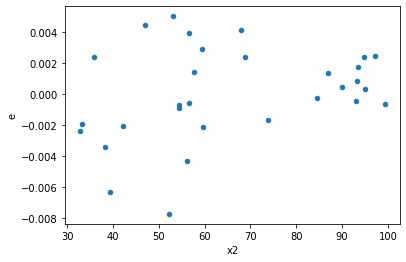

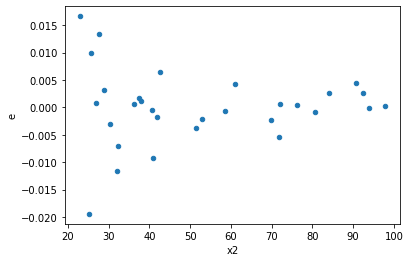

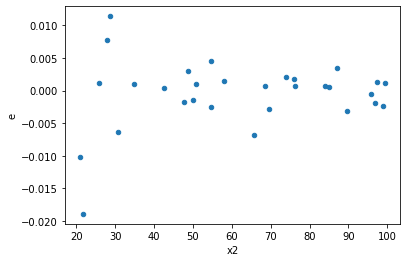

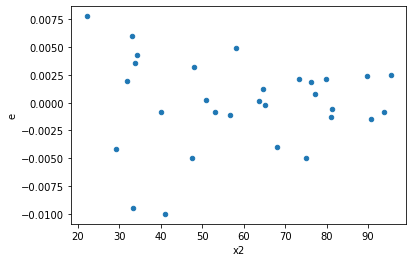

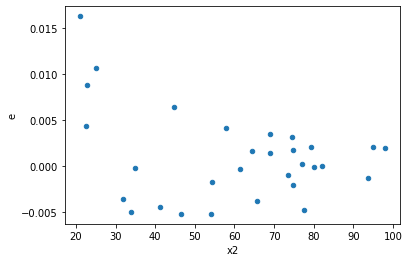

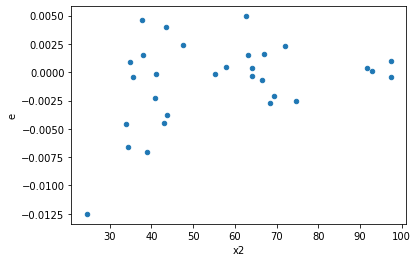

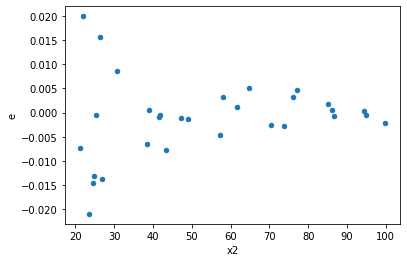

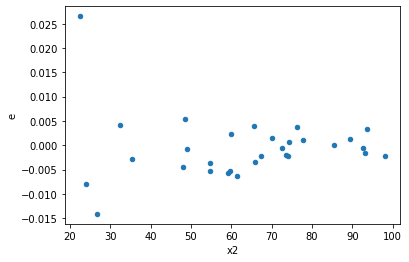

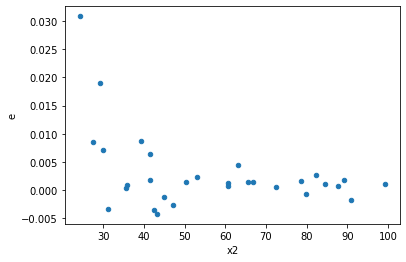

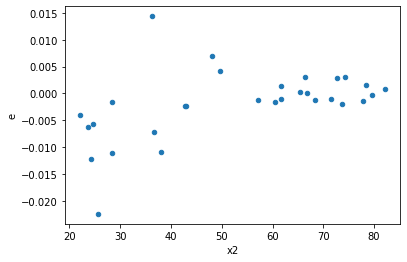

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,14.0,10.0,0.00012434030551911388,0.00011168422160592737,8.88145039422242e-06,1.1168422160592737e-05,1.2574998074478965,0.728240191499482,0.635879904250259,0.364120095749741,Reject001=1 : Homoscedasticity
2.0,13.0,11.0,7.304427912850118e-05,0.0006649353448774329,5.618790702192399e-06,6.0448667716130266e-05,10.75830564262587,0.0003782127198348473,0.9998108936400826,0.00018910635991742364,Reject001=0 : Heteroscedasticity
4.0,8.0,16.0,9.06703101547112e-05,0.00042637996840484644,1.13337887693389e-05,2.6648748025302903e-05,2.3512656330242625,0.13852606245306376,0.9307369687734681,0.06926303122653188,Reject001=1 : Homoscedasticity
10.0,12.0,12.0,4.028642540852704e-05,0.001697415573560402,3.3572021173772534e-06,0.00014145129779670015,42.13368538776156,1.2978496521931504e-07,0.9999999351075174,6.489248260965752e-08,Reject001=0 : Heteroscedasticity
11.0,16.0,8.0,7.170897807375014e-05,0.00027998297003376573,4.4818111296093835e-06,3.4997871254220717e-05,7.8088679424719505,0.006141195408261968,0.996929402295869,0.003070597704130984,Reject001=0 : Heteroscedasticity
12.0,11.0,13.0,8.76836969441688e-05,0.0005681139667614913,7.971245176742619e-06,4.3701074366268555e-05,5.482339759636728,0.005062878003700533,0.9974685609981497,0.0025314390018502664,Reject001=0 : Heteroscedasticity
13.0,16.0,8.0,0.00012087299001533233,0.0005419078606182157,7.554561875958271e-06,6.773848257727696e-05,8.96656665065498,0.0038032732207706754,0.9980983633896147,0.0019016366103853377,Reject001=0 : Heteroscedasticity
14.0,15.0,9.0,0.00010898293742926438,0.0005979985600613667,7.265529161950958e-06,6.644428445126298e-05,9.145140425452672,0.0020805531118084364,0.9989597234440958,0.0010402765559042182,Reject001=0 : Heteroscedasticity
16.0,11.0,13.0,0.00015237234483552584,0.0002978709857104485,1.3852031348684167e-05,2.2913152746957575e-05,1.654136651165906,0.38510990580480975,0.8074450470975951,0.19255495290240487,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,10.0,0.00012434030551911388,0.00011168422160592737,8.88145039422242e-06,1.1168422160592737e-05,1.2574998074478965,0.728240191499482,Reject001=1 : Homoscedasticity
1.0,14.0,10.0,0.0008692915054703473,0.00015105300333007074,6.20922503907391e-05,1.5105300333007074e-05,0.2432719097464052,0.0166251698748542,Reject001=1 : Homoscedasticity
2.0,13.0,11.0,7.304427912850118e-05,0.0006649353448774329,5.618790702192399e-06,6.0448667716130266e-05,10.75830564262587,0.0003782127198348473,Reject001=0 : Heteroscedasticity
3.0,7.0,17.0,0.00023199982037769366,0.00012340810299705146,3.314283148252767e-05,7.259300176297145e-06,0.2190307783486792,0.048659935753776536,Reject001=1 : Homoscedasticity
4.0,8.0,16.0,9.06703101547112e-05,0.00042637996840484644,1.13337887693389e-05,2.6648748025302903e-05,2.3512656330242625,0.13852606245306376,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.00015212945576212285,0.0001012885649572856,1.5212945576212285e-05,7.234897496948971e-06,0.4755750594586899,0.24085741255183107,Reject001=1 : Homoscedasticity
6.0,11.0,13.0,0.0008150167376626187,0.0004890288727117536,7.40924306966017e-05,3.761760559321182e-05,0.5077118571970022,0.267464092464364,Reject001=1 : Homoscedasticity
7.0,6.0,18.0,0.0007354301549747531,0.00016068311538645403,0.00012257169249579218,8.926839743691891e-06,0.0728295380599264,0.0038086729456518857,Reject001=0 : Heteroscedasticity
8.0,16.0,8.0,0.0008317314822119939,1.151738428748331e-05,5.198321763824962e-05,1.4396730359354137e-06,0.02769495812964244,1.646077578382253e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      575
Reject001=0 : Heteroscedasticity    425
Name: Result_test, dtype: int64